In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('./datas/wine.csv', header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [5]:
# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary() 

c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │           372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# 모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25) # 0.8 x 0.25 = 0.2

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.2457 - loss: 11.2014 - val_accuracy: 0.2285 - val_loss: 5.7345
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2486 - loss: 4.2920 - val_accuracy: 0.3962 - val_loss: 0.8277
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6760 - loss: 0.5563 - val_accuracy: 0.7815 - val_loss: 0.3843
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7646 - loss: 0.4389 - val_accuracy: 0.7969 - val_loss: 0.4131
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8082 - loss: 0.4185 - val_accuracy: 0.8754 - val_loss: 0.3327
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8771 - loss: 0.3127 - val_accuracy: 0.9192 - val_loss: 0.2662
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9164 - loss: 0.2741 - val_accuracy: 0.9192 - val_loss: 0.2738
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9239 - loss: 0.2595 - val_accuracy: 0.9231 - val_loss: 0.2475
Epoch

In [8]:
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - accuracy: 0.9594 - loss: 0.1127
Test accuracy: 0.949999988079071


In [9]:
df = pd.read_csv('./datas/wine.csv', header=None)
# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]
# 학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
 shuffle=True)
# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam',
 metrics=['accuracy'])

c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 30)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 12)             │           372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint

modelpath="./datas/model/all/{epoch:02d}-{val_accuracy:.4f}.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)
# 모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0,
 callbacks=[checkpointer])


Epoch 1: saving model to ./datas/model/all/01-0.7592.keras

Epoch 2: saving model to ./datas/model/all/02-0.8238.keras

Epoch 3: saving model to ./datas/model/all/03-0.8038.keras

Epoch 4: saving model to ./datas/model/all/04-0.8300.keras

Epoch 5: saving model to ./datas/model/all/05-0.8631.keras

Epoch 6: saving model to ./datas/model/all/06-0.8938.keras

Epoch 7: saving model to ./datas/model/all/07-0.9123.keras

Epoch 8: saving model to ./datas/model/all/08-0.9177.keras

Epoch 9: saving model to ./datas/model/all/09-0.9200.keras

Epoch 10: saving model to ./datas/model/all/10-0.9200.keras

Epoch 11: saving model to ./datas/model/all/11-0.9262.keras

Epoch 12: saving model to ./datas/model/all/12-0.9285.keras

Epoch 13: saving model to ./datas/model/all/13-0.9300.keras

Epoch 14: saving model to ./datas/model/all/14-0.9300.keras

Epoch 15: saving model to ./datas/model/all/15-0.9323.keras

Epoch 16: saving model to ./datas/model/all/16-0.9315.keras

Epoch 17: saving model to ./data

In [12]:
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9515 - loss: 0.1345 
Test accuracy: 0.9461538195610046


In [14]:
from tensorflow.keras.callbacks import LambdaCallback
import tensorflow as tf
# 50번마다 한 번씩 출력하는 콜백 함수
def custom_log(epoch, logs):
 if (epoch + 1) % 50 == 0:
    num_batches = len(X_train) // 500
    print(f"Epoch {epoch+1}/2000")
    tf.print(f"{num_batches}/{num_batches} ━━━━━━━━━━━━━━━━━━━━ "
              f"accuracy: {logs['accuracy']:.4f} - loss: {logs['loss']:.4f} - "
              f"val_accuracy: {logs['val_accuracy']:.4f} - val_loss: {logs['val_loss']:.4f}")
show_status = LambdaCallback(on_epoch_end=custom_log)

history=model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=0, callbacks=show_status)

Epoch 50/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.9746 - loss: 0.0737 - val_accuracy: 0.9723 - val_loss: 0.1006
Epoch 100/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.9820 - loss: 0.0541 - val_accuracy: 0.9777 - val_loss: 0.0876
Epoch 150/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.9843 - loss: 0.0489 - val_accuracy: 0.9838 - val_loss: 0.0831
Epoch 200/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.9843 - loss: 0.0447 - val_accuracy: 0.9869 - val_loss: 0.0809
Epoch 250/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.9859 - loss: 0.0419 - val_accuracy: 0.9854 - val_loss: 0.0822
Epoch 300/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.9877 - loss: 0.0434 - val_accuracy: 0.9900 - val_loss: 0.0833
Epoch 350/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.9887 - loss: 0.0375 - val_accuracy: 0.9892 - val_loss: 0.0853
Epoch 400/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.9902 - loss: 0.0362 - val_accuracy: 0.9877 - val_loss: 0.0916
Epoch 450/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.9902 - loss: 0.0356

In [16]:
hist_df=pd.DataFrame(history.history)
hist_df

,accuracy,loss,val_accuracy,val_loss
0,0.950731,0.129171,0.943846,0.161029
1,0.950475,0.128555,0.944615,0.161158
2,0.950475,0.126125,0.943846,0.160449
3,0.950475,0.124890,0.945385,0.154858
4,0.952784,0.122867,0.945385,0.155897
...,...,...,...,...
1995,0.995381,0.016207,0.982308,0.230376
1996,0.994611,0.016294,0.986923,0.228783
1997,0.994355,0.016679,0.986154,0.222923
1998,0.995381,0.016365,0.988462,0.227401


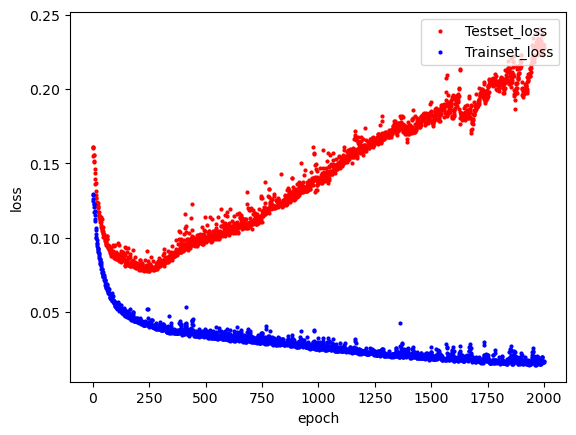

In [20]:
# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장합니다.
y_vloss=hist_df['val_loss']
# y_loss에 학습셋의 오차를 저장합니다.
y_loss=hist_df['loss']
#x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시합니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')
plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [21]:
df = pd.read_csv('./datas/wine.csv', header=None)
# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]
# 학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 30)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 12)             │           372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)
# 최적화 모델이 저장될 폴더와 모델의 이름을 정합니다.
modelpath="./datas/model/bestmodel.keras"
# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)
# 모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split= 0.25, verbose = 1,
                  callbacks = [early_stopping_callback,checkpointer])

Epoch 1/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.2503 - loss: 11.3288 - val_accuracy: 0.2354 - val_loss: 7.8213
Epoch 2/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2507 - loss: 6.3146 - val_accuracy: 0.2354 - val_loss: 3.4968
Epoch 3/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2547 - loss: 3.0103 - val_accuracy: 0.2354 - val_loss: 2.0561
Epoch 4/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2507 - loss: 1.7100 - val_accuracy: 0.2354 - val_loss: 1.0108
Epoch 5/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2612 - loss: 0.8480 - val_accuracy: 0.9138 - val_loss: 0.5863
Epoch 6/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9317 - loss: 0.5331 - val_accuracy: 0.9315 - val_loss: 0.4194
Epoch 7/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9327 - loss: 0.3896 - val_accuracy: 0.9308 - val_loss: 0.3339
Epoch 8/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9317 - loss: 0.3198 - val_accuracy: 0.9315 - 

In [26]:
score = model.evaluate(X_test, y_test)
print("Test accuracy:", score[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9794 - loss: 0.0529 
Test accuracy: 0.9815384745597839
